In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
def worldBank_data(x):
    '''
    To retrieve excel data from the World Bank
    
    Argument
    --------
        x(xls or xlsx): excel format file containing data to import.
    Returns: It returns a data frame of data by country and by date (usually by year).
    '''

    df=pd.read_excel(x)
    df.columns=df.iloc[2,:]
    df=df.set_index('Country Name')
    df1=df.iloc[3:,3:]
    df1.columns=[int(i) for i in df1.columns]
    return df1

In [3]:
df_gdp=worldBank_data("API_NY.GDP.PCAP.CD_DS2_en_excel_v2_5871574.xls")  # import GDP per capita data
df_gdp.head(3)

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26515.678080,26942.307976,28421.386493,28451.273745,29326.708058,30918.515218,31902.762582,24487.863569,29342.100730,NaN
Africa Eastern and Southern,161.638982,161.111657,170.538537,198.038919,178.019217,196.818756,207.945574,210.149894,223.040659,248.44822,...,1736.222507,1724.534381,1545.559084,1436.094404,1613.668488,1550.111762,1499.954437,1353.927527,1539.165543,1622.39172
Afghanistan,62.369375,62.443703,60.950364,82.021738,85.511073,105.243196,143.103233,167.165675,134.012768,134.25036,...,651.987862,628.146804,592.476165,520.251955,530.149863,502.057099,500.522981,516.866797,363.674087,NaN


In [4]:
# Import metadata to relate Country name to Region
df_countries=pd.read_excel("API_NY.GDP.PCAP.CD_DS2_en_excel_v2_5871574.xls",sheet_name='Metadata - Countries')
df_countries.head(3)

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,NaN,Aruba
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan


In [5]:
set(df_countries.Region)  # display region names

{'East Asia & Pacific',
 'Europe & Central Asia',
 'Latin America & Caribbean',
 'Middle East & North Africa',
 'North America',
 'South Asia',
 'Sub-Saharan Africa',
 nan}

In [6]:
# select only countries of Region Sub-Saharan Africa.
lafrica_countries=df_countries[df_countries['Region']=='Sub-Saharan Africa'].TableName.tolist()
lafrica_countries[:5]

['Angola', 'Burundi', 'Benin', 'Burkina Faso', 'Botswana']

In [7]:
# select countries from Sub-Sahara

# make the list of these countries
dfgdp_Africa=df_gdp[[i in lafrica_countries for i in df_gdp.index]]
dfgdp_Africa.head(3)

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country Name,,,,,,,,,,,,,,,,,,,,,
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5101.983876,5059.080441,3100.830685,1709.515534,2283.214233,2487.500996,2142.238757,1502.950754,1903.717405,2998.501158
Burundi,71.360224,72.088782,73.942008,78.948269,85.964725,50.990420,51.808640,54.450305,54.647466,55.543775,...,241.547666,257.818557,289.359627,242.539527,244.145422,232.060617,216.972971,216.827417,221.157803,238.441876
Benin,90.035831,92.374860,91.171392,96.254664,100.468088,105.966856,108.628227,107.682862,112.477968,111.695273,...,1214.295566,1251.504765,1041.652523,1049.820303,1095.274459,1194.438214,1170.965533,1237.949295,1361.100749,1303.222014


In [8]:
df_internet=worldBank_data('API_IT.NET.USER.ZS_DS2_en_excel_v2_5872055 (1).xls')
df_internet.head(3)

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,78.900000,83.780000,88.661227,93.542454,97.170000,NaN,NaN,NaN,NaN,NaN
Africa Eastern and Southern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.126945,12.237716,14.485849,15.753330,17.310987,20.063024,22.589591,24.988401,27.660654,NaN
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.900000,7.000000,8.260000,11.000000,13.500000,16.800000,17.600000,18.400000,NaN,NaN


In [9]:
dfinternet_Africa=df_internet[[i in lafrica_countries for i in df_internet.index]]
dfinternet_Africa.head(3)

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country Name,,,,,,,,,,,,,,,,,,,,,
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.000000,21.4,22.000000,23.2,26.000000,29.0,32.129392,32.550147,32.602302,NaN
Burundi,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,1.264218,1.4,2.000000,2.2,2.660749,2.7,2.731443,3.787954,5.804922,NaN
Benin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.900000,6.0,11.254988,14.5,18.700000,19.0,22.415938,28.229154,33.965331,NaN


In [10]:
# Merge GDP per capita and Internet Users data for 2021
dfgdp_Africa2021=pd.DataFrame(dfgdp_Africa[2021].dropna())
dfgdp_Africa2021.columns=['GDP per capita']
dfinternet_Africa2021=pd.DataFrame(dfinternet_Africa[2021].dropna())
dfinternet_Africa2021.columns=['Internet users (% population)']
df_Af=pd.merge(dfinternet_Africa2021,dfgdp_Africa2021,left_index=True, right_index=True)
df_Af.head(5)

,Internet users (% population),GDP per capita
Country Name,,
Angola,32.602302,1903.717405
Burundi,5.804922,221.157803
Benin,33.965331,1361.100749
Burkina Faso,21.579827,893.077196
Botswana,73.500000,7238.796096


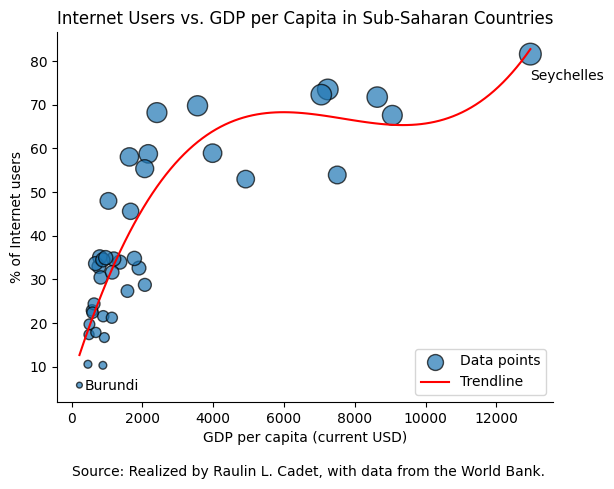

In [12]:
fig=plt.subplot()
plt.scatter(x=df_Af['GDP per capita'],y=df_Af['Internet users (% population)'],alpha=0.7,s=df_Af['Internet users (% population)']*3,edgecolors='k',label='Data points')

# Perform linear regression
coefficients = np.polyfit(df_Af['GDP per capita'],df_Af['Internet users (% population)'], 3)
linear_fit = np.poly1d(coefficients)
# Create a range of x values for the line
x_range = np.linspace(min(df_Af['GDP per capita']), max(df_Af['GDP per capita']), 100)

# Calculate corresponding y values for the line
y_fit = linear_fit(x_range)

# Plot the smooth line
plt.plot(x_range, y_fit, label='Trendline', color='red')
plt.xlabel('GDP per capita (current USD)')
plt.ylabel('% of Internet users')
plt.title('Internet Users vs. GDP per Capita in Sub-Saharan Countries')
fig.spines[['top','right']].set_visible(False)
plt.legend(loc='lower right')
plt.text(x=0,y=-15,s='Source: Realized by Raulin L. Cadet, with data from the World Bank.',fontsize=10)
for i in range(df_Af.shape[0]):
    if df_Af['GDP per capita'][i]==max(df_Af['GDP per capita']):
        plt.text(df_Af['GDP per capita'][i],list(df_Af['Internet users (% population)'])[i]-6,s=df_Af.index[i])
    if df_Af['GDP per capita'][i]==min(df_Af['GDP per capita']):
        plt.text(df_Af['GDP per capita'][i]+150,list(df_Af['Internet users (% population)'])[i]-1,s=df_Af.index[i])
           